# Exercise 2 - Random matrix theory

**2.1** Generate a spectrum of random matrices $\mathcal{M}$

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import scipy.linalg
from tqdm.notebook import tqdm

import disordered_sys.generate

In [2]:
np.random.seed(42)
c = 10
N = 2**10

figure_dir = Path.cwd() / ".." / "report" / "figures"

Generate a symmetric gaussian matrix with $\mathcal{N}(0, \frac{1}{c})$

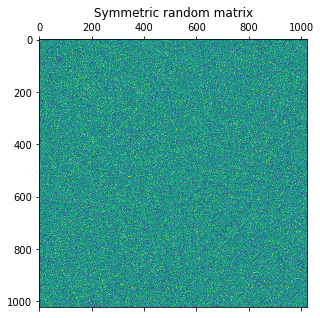

In [3]:
random_nums = np.random.normal(0, 1 / np.sqrt(c), size=int(N * (N + 1) / 2))
j = np.zeros(shape=(N, N))
for i in range(N):
    t = i * (i + 1) // 2
    j[i, 0:i + 1] = random_nums[t:t + i + 1]
    j[0:i, i] = random_nums[t:t + i]

plt.matshow(j, fignum=100)
plt.title("Symmetric random matrix")
plt.show()

Generate a Random Regular Graph with connectivity $c$

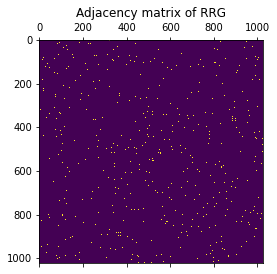

In [4]:
graph = nx.random_regular_graph(c, N)
a = nx.to_numpy_array(graph)

plt.matshow(a, fignum=100)
plt.title("Adjacency matrix of RRG")
plt.show()

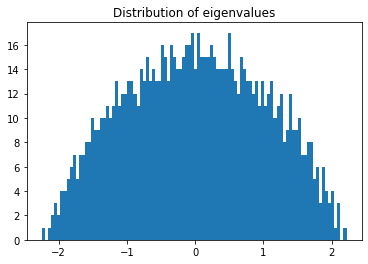

In [5]:
eigv, *_ = scipy.linalg.eigh(a * j)
plt.hist(eigv, bins=100)
plt.title("Distribution of eigenvalues")
plt.show()

**Exercise 2.1.1:**

  0%|          | 0/10 [00:00<?, ?it/s]

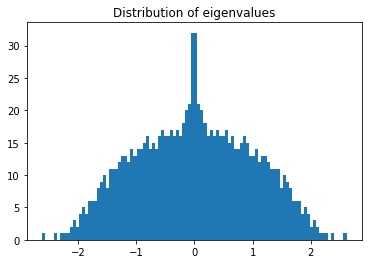

In [6]:
N = 2**10
c = 3
runs = 10

eigvs = np.zeros((runs, N))
for idx in tqdm(range(runs)):
    m = disordered_sys.generate.generate_m(c, N)
    eigv, *_ = scipy.linalg.eigh(m)
    eigvs[idx, :] = eigv

plt.title("Distribution of eigenvalues")
plt.hist(eigvs.mean(axis=0), bins=100)
plt.savefig(figure_dir / "2_1_1_spectrum_sparse.pdf")
plt.show()

**Exercise 2.1.2:**

  0%|          | 0/10 [00:00<?, ?it/s]

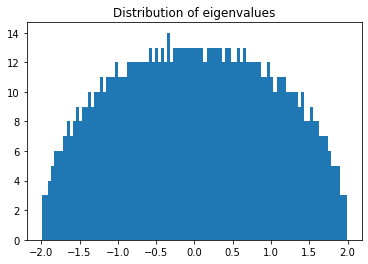

In [7]:
N = 2**10
runs = 10

eigvs = np.zeros((runs, N))
for idx in tqdm(range(runs)):
    m = disordered_sys.generate.generate_m_full(N)
    eigv, *_ = scipy.linalg.eigh(m)
    eigvs[idx, :] = eigv

plt.hist(eigvs.mean(axis=0), bins=100)
plt.title("Distribution of eigenvalues")
plt.savefig(figure_dir / "2_1_2_spectrum_full.pdf")
plt.show()

**Exercise 2.1.3:**

In [8]:
N = 2**12
m = disordered_sys.generate.generate_m_full(N)
eigv, *_ = scipy.linalg.eigh(m)

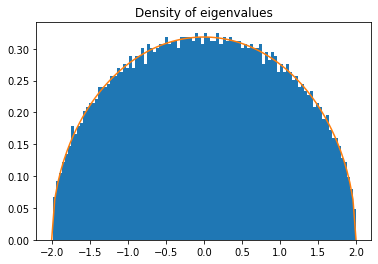

In [9]:
def wiegner_semicircle_law(x):
    return np.sqrt(4 - x * x) / 2 / np.pi

plt.hist(eigv, bins=100, density=True, stacked=True)

x = np.linspace(start=-2, stop=2, num=100)
plt.plot(x, wiegner_semicircle_law(x))
plt.title("Density of eigenvalues")
plt.savefig(figure_dir / "2_1_3_wigner_semicircle.pdf")
plt.show()

**Exercise 2.1.4:**

In [ ]:
N = 2**10
runs = 10
c = np.linspace(1, N - 1, num=runs, dtype=np.int16)

fig, axs = plt.subplots(nrows=runs // 2, ncols=2, figsize=(10 * 1.2, 20 * 1.2))

eigvs = np.zeros((runs, N))
for idx in tqdm(range(runs)):
    m = disordered_sys.generate.generate_m(c[idx], N)
    eigv, *_ = scipy.linalg.eigh(m)
    eigvs[idx, :] = eigv

    ax = axs[idx // 2, idx % 2]
    ax.set_title(f"C = {c[idx]}")
    ax.hist(eigv, bins=100)

fig.suptitle("Universality classes for different connectivity")
fig.savefig(figure_dir / "2_1_4_universality_classes.pdf")
plt.show()

  0%|          | 0/10 [00:00<?, ?it/s]